# How to apply Logistic Regression on a Multi-Class Classification problem

A basic roadmap.

### 1. Load the libraries/modules

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

### 2. Load the dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'

column_names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type']

glass_data = pd.read_csv(url, names=column_names)

glass_data.set_index('ID', inplace=True)

### 3. Transform the dataset into a DataFrame (if needed)

In [10]:
print(type(glass_data))

<class 'pandas.core.frame.DataFrame'>


### 4. Exploratory Data Analysis

In [11]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [13]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
glass_data.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

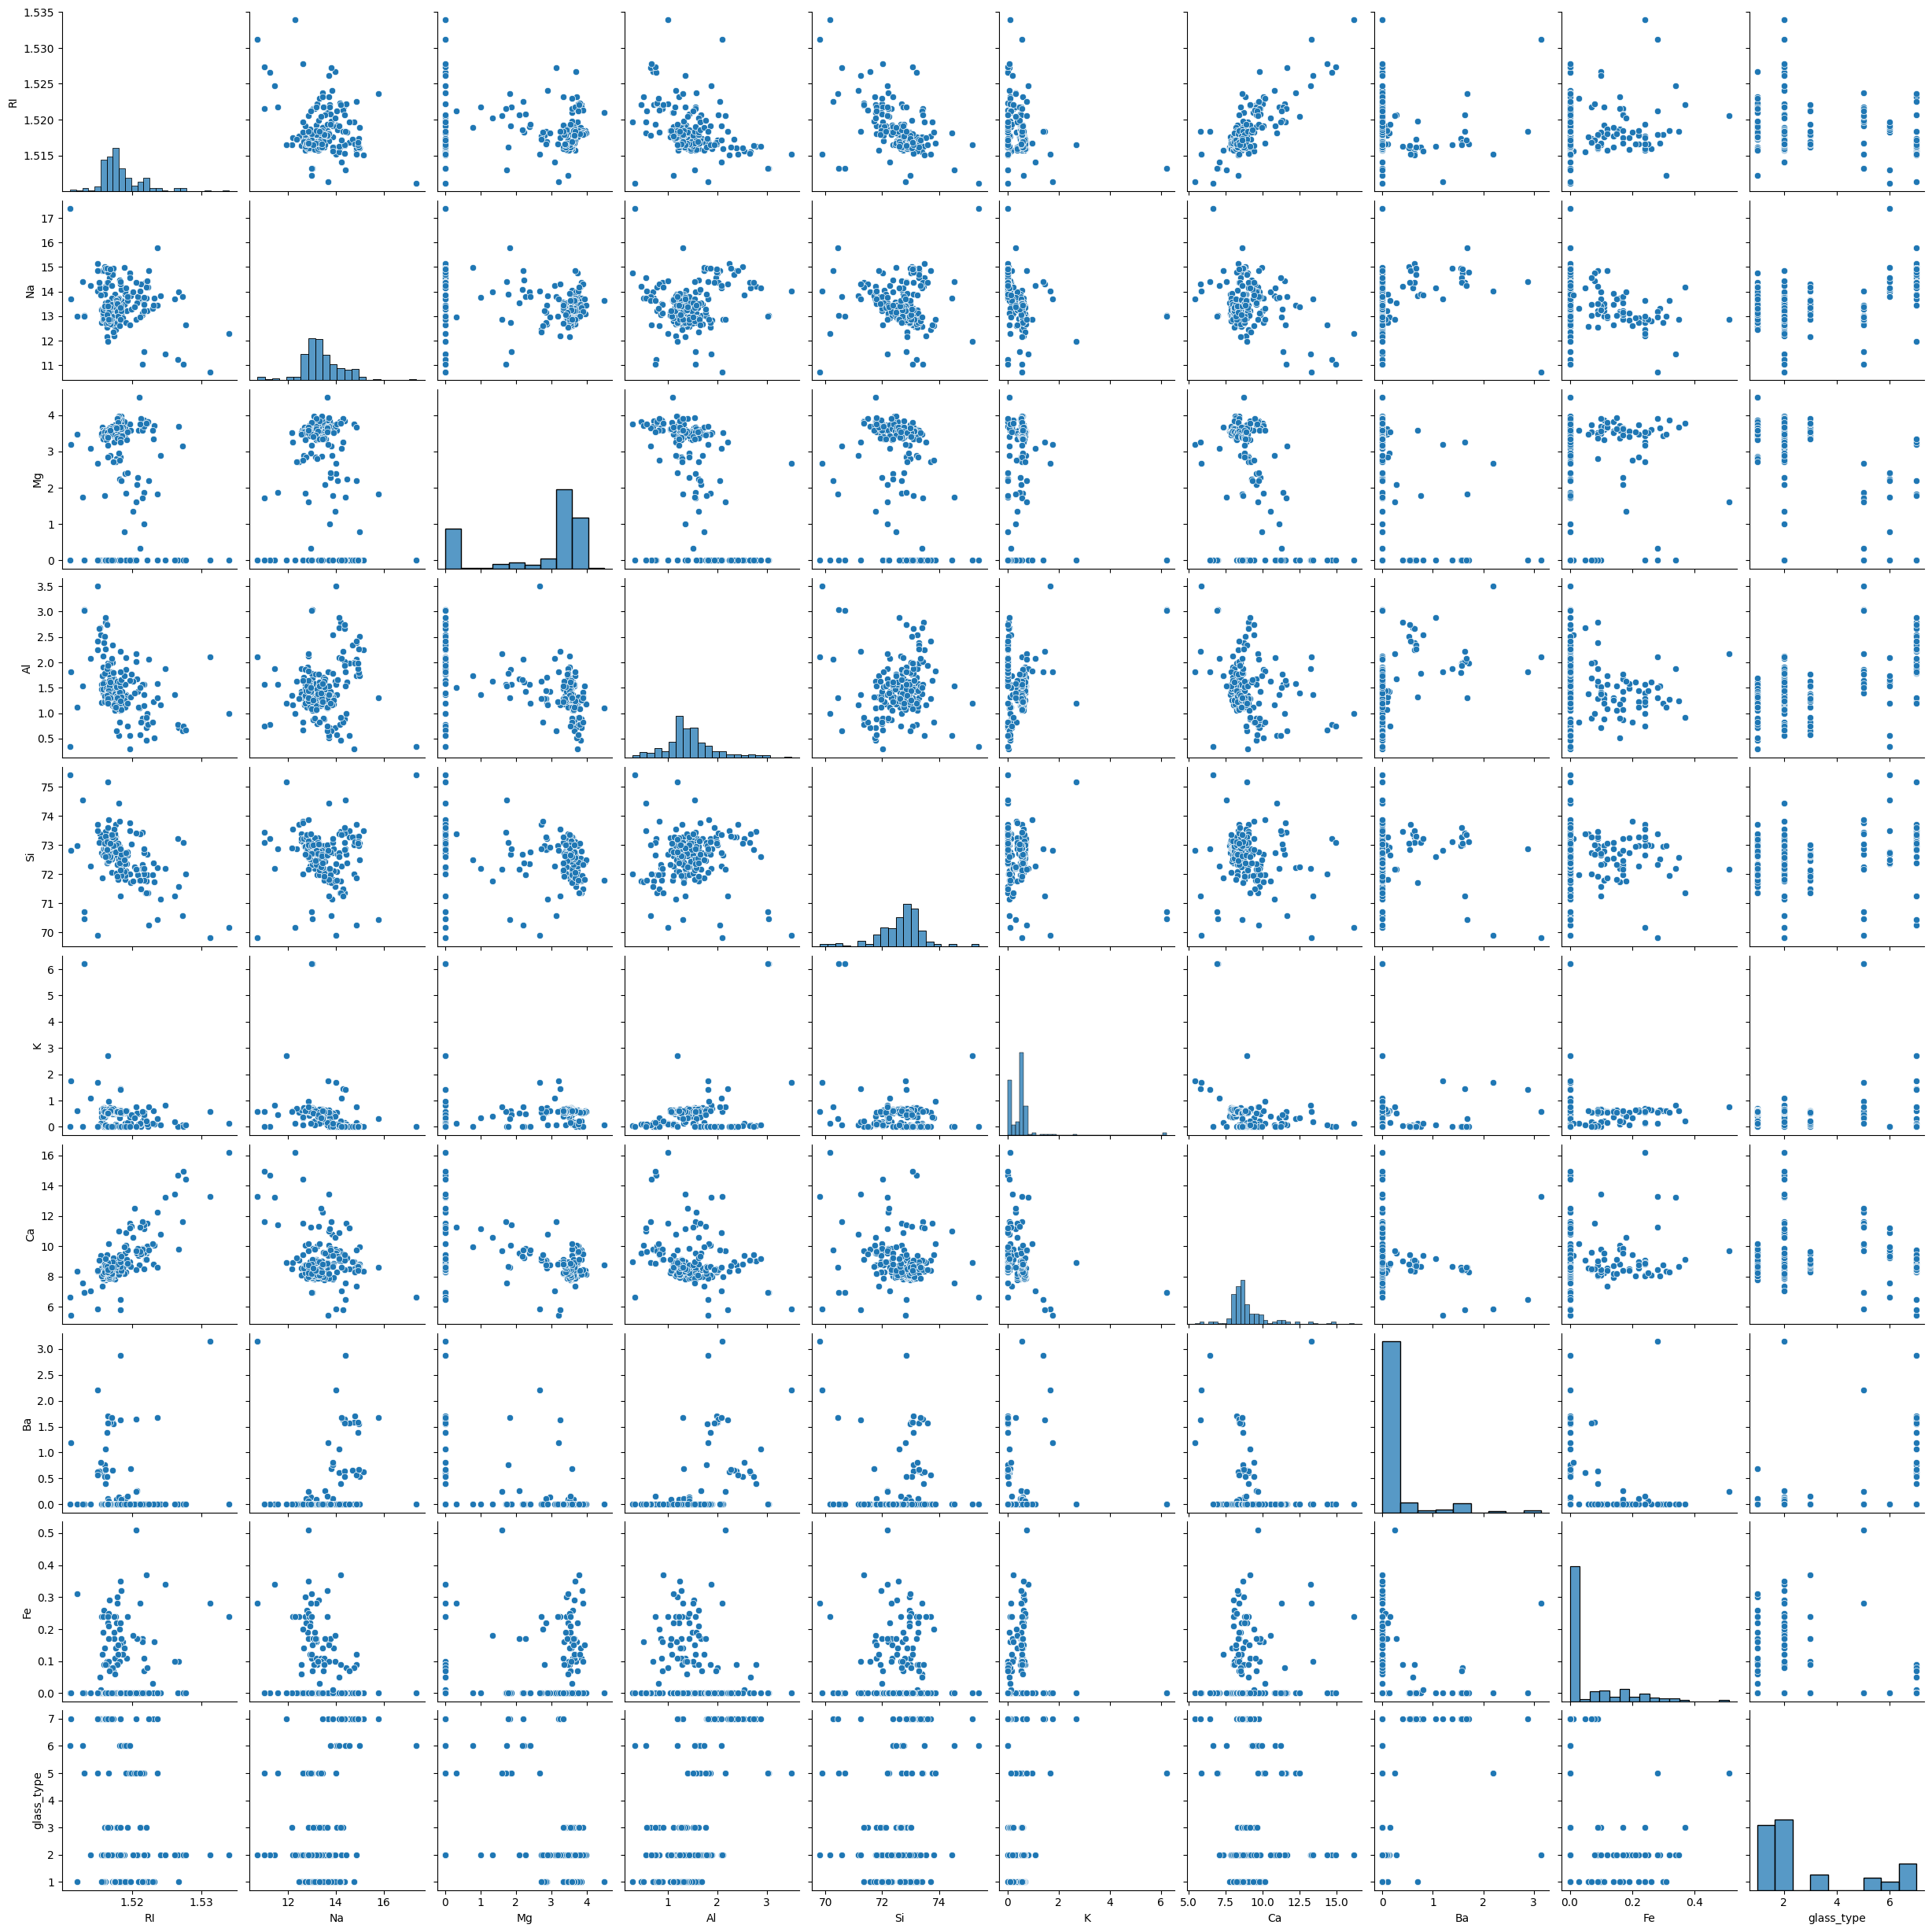

In [15]:
sns.pairplot(glass_data)

Text(0.05, 0.9, "Pearson's R: 0.8104\np-value: 4.01e-51")

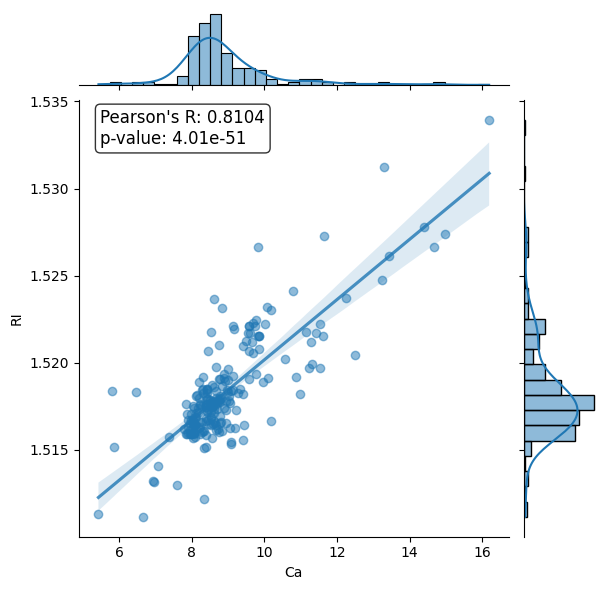

In [18]:
from scipy.stats import pearsonr

y = 'RI'
x = 'Ca'

jp = sns.jointplot(data=glass_data, x=x, y=y, kind='reg', scatter_kws={"alpha": 0.5}, line_kws={"alpha": 0.8})
pearson_r, p_value = pearsonr(glass_data[x], glass_data[y])

jp.ax_joint.annotate(
    f"Pearson's R: {pearson_r:.4f}\np-value: {p_value:.2e}",
    xy=(0.05, 0.9),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)

Text(0.05, 0.9, "Pearson's R: -0.0055\np-value: 9.36e-01")

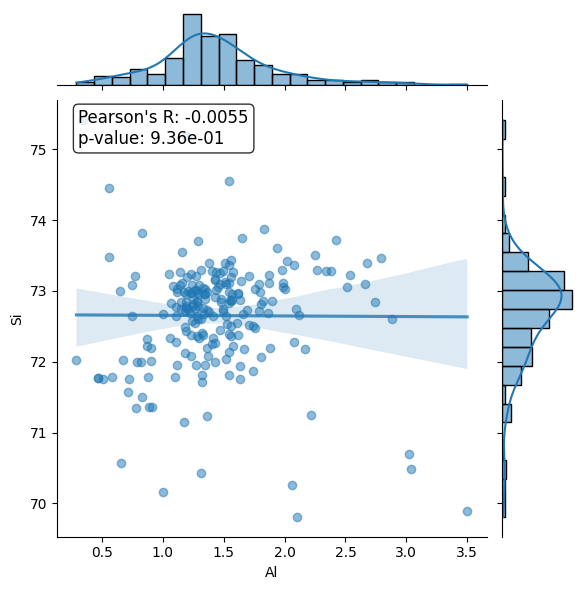

In [19]:
y = 'Si'
x = 'Al'

jp = sns.jointplot(data=glass_data, x=x, y=y, kind='reg', scatter_kws={"alpha": 0.5}, line_kws={"alpha": 0.8})
pearson_r, p_value = pearsonr(glass_data[x], glass_data[y])

jp.ax_joint.annotate(
    f"Pearson's R: {pearson_r:.4f}\np-value: {p_value:.2e}",
    xy=(0.05, 0.9),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)

Text(0.05, 0.9, "Pearson's R: -0.0698\np-value: 3.09e-01")

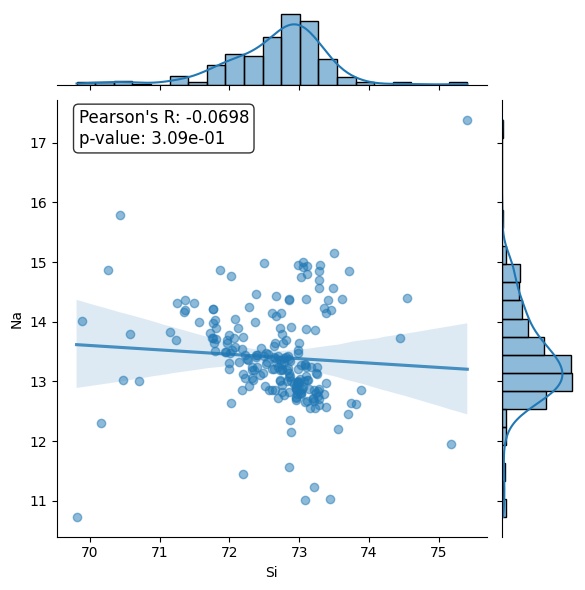

In [20]:
y = 'Na'
x = 'Si'

jp = sns.jointplot(data=glass_data, x=x, y=y, kind='reg', scatter_kws={"alpha": 0.5}, line_kws={"alpha": 0.8})
pearson_r, p_value = pearsonr(glass_data[x], glass_data[y])

jp.ax_joint.annotate(
    f"Pearson's R: {pearson_r:.4f}\np-value: {p_value:.2e}",
    xy=(0.05, 0.9),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)

<Axes: xlabel='glass_type', ylabel='count'>

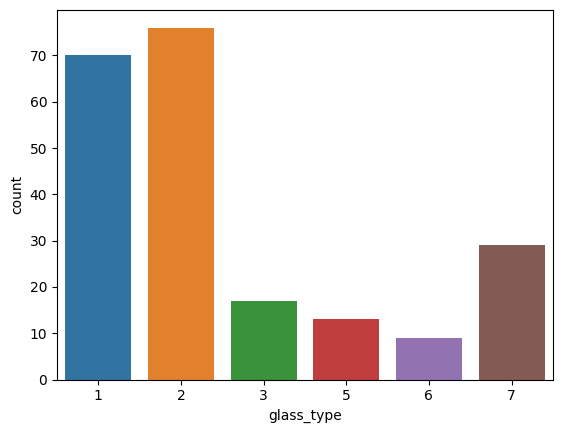

In [21]:
sns.countplot(data=glass_data, x='glass_type')

### 5. Split the data and standardise features (if required)

In [22]:
X = glass_data.drop('glass_type', axis=1)
y = glass_data['glass_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### 6. Set model, fit, and get predictions

In [23]:
model = LogisticRegression(multi_class='ovr', solver='liblinear')

model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

### 7. Evaluate the model's performance

In [28]:
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:")
print(cm_df)

report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nClassification Report:")
print(report)
print("\nAccuracy:")
print(accuracy)

Confusion Matrix:
    1  2  3  5  6  7
1  10  8  0  0  0  0
2   3  7  0  0  0  0
3   2  4  0  0  0  0
5   0  2  0  2  0  0
6   0  0  0  0  0  2
7   0  0  0  1  0  2

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.56      0.61        18
           2       0.33      0.70      0.45        10
           3       0.00      0.00      0.00         6
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         2
           7       0.50      0.67      0.57         3

    accuracy                           0.49        43
   macro avg       0.36      0.40      0.37        43
weighted avg       0.45      0.49      0.45        43


Accuracy:
0.4883720930232558


C:\Users\fmiranda\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fmiranda\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fmiranda\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [29]:
cross_val_accuracy = np.mean(cross_val_score(model, X_train_std, y_train, cv=5))
print("\nCross-validated Accuracy:")
print(cross_val_accuracy)


Cross-validated Accuracy:
0.6141176470588235


### 8. Interpret the results

$\text{Unfortunately the model performed rather poorly overall. It might be the case that multi-class logistic regression is not really the ideal model to be used here.}$